In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from decision_tree_definition import decision_tree

## Load data

In [3]:


class Sequence_Iteration:
    ''' 
    A class which iterates over a list 
    '''
    def __init__(self,sequence_list):
        self._sequence_list = sequence_list #Makes the input list a class variable
        self._counter =  0 

    def __iter__(self): # Makes the class an iterator
        return self    

    def __next__(self): #Defines the Rules the iterator must follow
        if self._counter < len(self._sequence_list): 
            list_attr = self._sequence_list[self._counter] 
            self._counter += 1 
            return list_attr 
        else: 
            raise StopIteration  

def data_reading_exchange_matrix(file_name_exchange):
    '''Reads in Quiver exchange matrix data and its class, and processes them into python lists, saving the data as floats''' 
    data = []
    em = open(file_name_exchange,'r') 
    data_em = em.readlines() 
    for i in data_em: 
        counter = 0
        n_removed = i.strip('\n')
        string_list = n_removed.split(',')
        for k in string_list: 
            test_value = float(k)
            string_list[counter] = test_value
            counter +=1 
        data.append(string_list)   
    em.close()    
    return data     

def components_finder_6(lists):
    '''
    INPUT: list of lists of 1 X 16 entries
    OUTPUT: lists of lists of 1 X 6 entries
    '''
    output =[]
    m = Sequence_Iteration(lists)
    for i in m: 
        outs = [i[1],i[2],i[3],i[6],i[7],i[11] ]
        output.append(outs)
    return output     

In [4]:
NMA_DATA = data_reading_exchange_matrix('./Experiment_4/Machine_Learning/Fourth_Experiment_NMA_data.txt')
NON_NMA_DATA = data_reading_exchange_matrix('./Experiment_4/Machine_Learning/Fourth_Experiment_MA_data.txt')
full_data = NMA_DATA + NON_NMA_DATA
# Output data sizes
print(len(full_data))
print(len(NMA_DATA))
print(len(NON_NMA_DATA))
print(len(NON_NMA_DATA+NMA_DATA))
#extracts just six of the entries
NON_NMA_DATA_NEW =components_finder_6(NON_NMA_DATA)
NMA_DATA_NEW = components_finder_6(NMA_DATA)
# Class Builders 
not_nma_class = np.full(len(NON_NMA_DATA_NEW),-1)
nma_class = np.full(len(NMA_DATA_NEW),1)
cutoff_value = len(nma_class)

s_data = np.concatenate((NON_NMA_DATA_NEW, NMA_DATA_NEW))
s_class = np.concatenate((not_nma_class, nma_class)) #not nma = -1, nma = 1
print(len(s_data))

15104
3022
12082
15104
15104


In [5]:
decision_tree_preds = []
for s in s_data:
    decision_tree_preds.append(decision_tree(np.array(s)))

Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is 0.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is 10.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is 10.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is -2.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is 0.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is -2.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is 10.0
Case not accounted for: Value of d6 is 0 Value of d4 is 4.0 Value of d2 is 1.0 Value of d2_2 is 11.0 Value of d4_3 is -2.0
Case not accounted

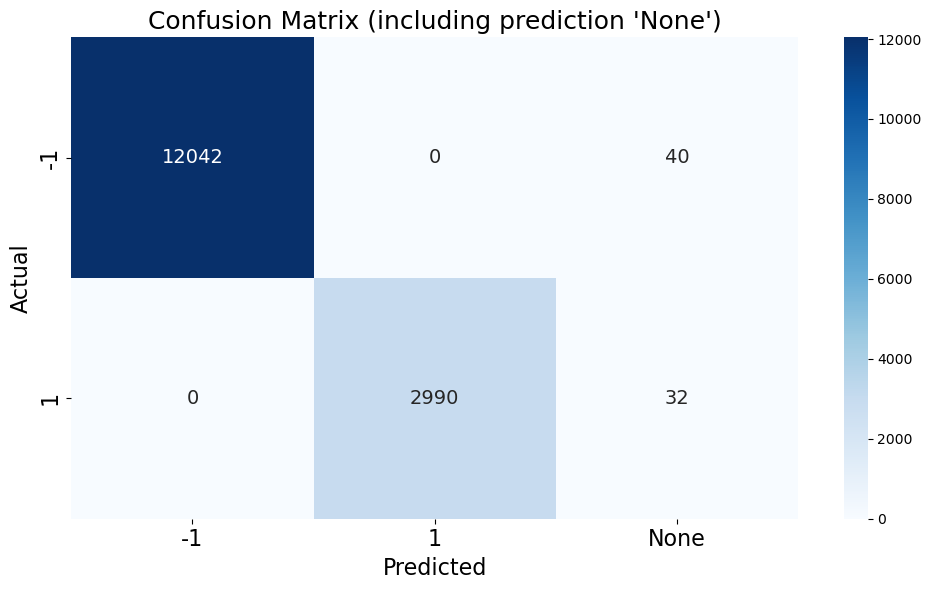

In [6]:

y_true_s = [str(t) for t in s_class]
y_pred_s = ["None" if p is None else str(p) for p in decision_tree_preds]

actual_labels = sorted(set(y_true_s))         
pred_labels   = sorted(set(y_pred_s))     


cm_rect = pd.crosstab(
    pd.Categorical(y_true_s, categories=actual_labels),
    pd.Categorical(y_pred_s, categories=pred_labels),
    rownames=["Actual"],
    colnames=["Predicted"],
    dropna=False
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm_rect, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})
ax.set_xlabel("Predicted", fontsize=16)
ax.set_ylabel("Actual", fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.set_title("Confusion Matrix (including prediction 'None')",fontsize=18)
plt.tight_layout()
plt.show()